# Predict Next Purchase

In [1]:
%matplotlib inline
import composeml as cp
import data

## Load Data

In [2]:
df = data.load_orders('data', nrows=1000000)
df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,order_time
0,120,33120,13,0,Organic Egg Whites,86,16,dairy eggs,23750,2015-01-11 08:00:00
1,120,31323,7,0,Light Wisconsin String Cheese,21,16,dairy eggs,23750,2015-01-11 08:00:00
2,120,1503,8,0,Low Fat Cottage Cheese,108,16,dairy eggs,23750,2015-01-11 08:00:00
3,120,28156,11,0,Total 0% Nonfat Plain Greek Yogurt,120,16,dairy eggs,23750,2015-01-11 08:00:00
4,120,41273,4,0,Broccoli Florets,123,4,produce,23750,2015-01-11 08:00:00


## Generate Labels

### Create Labeling Function

In [3]:
def bought_product(df, product_name):
    purchased = df.product_name.str.contains(product_name).any()
    return purchased

### Construct Label Maker

In [4]:
lm = cp.LabelMaker(
    target_entity='user_id',
    time_index='order_time',
    labeling_function=bought_product,
    window_size='4w',
)

### Search Labels

In [5]:
lt = lm.search(
    df,
    minimum_data='2015-01-01',
    num_examples_per_instance=-1,
    product_name='Banana',
    verbose=True,
)

lt.head()

Elapsed: 01:54 | Remaining: 00:00 | Progress: 100%|██████████| user_id: 19477/19477 


,user_id,cutoff_time,bought_product
id,,,
0,4,2015-01-01,False
1,7,2015-01-25,False
2,10,2015-01-25,False
3,13,2015-01-01,False
4,19,2015-01-01,True


### Describe Labels

Label Distribution
------------------
False     14071
True       7164
Total:    21235


Settings
--------
num_examples_per_instance                        -1
minimum_data                             2015-01-01
window_size                  <4 * Weeks: weekday=6>
gap                          <4 * Weeks: weekday=6>


Transforms
----------
No transforms applied



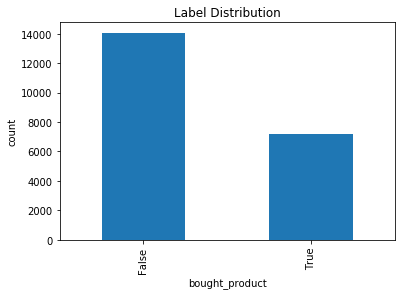

In [6]:
lt.describe()
lt.plot.distribution();